# Assignment 1 - Movielens 1M dataset Analysis 

#### Submitted by : Shivani Shrikant Naik

The dataset is organised in 3 tables : 
 - Users 
 - Movies 
 - Ratings 
<br>We have also been provided with a combined copy of genre-separated dataset. I have made use of both for this analysis.

In [1]:
#Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
#set max display option to 100 for better viewing
pd.set_option('display.max_rows', 500)



In [2]:
#Mapping of occupation and age column to text

occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

### Data Reading

Read all data files: merged data, users, movies, ratings and convert age, occupation to actual values

In [3]:
df = pd.read_csv('movie_lens_genre_separated.tsv', sep = '\t')
movies = pd.read_csv('ml-1m/movies.dat','::', header = None, encoding = "ISO-8859-1")
users = pd.read_csv('ml-1m/users.dat','::', header = None, encoding = "ISO-8859-1")
ratings = pd.read_csv('ml-1m/ratings.dat','::', header = None, encoding = "ISO-8859-1")
movies.columns = ['movie_id', 'title', 'genres']
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
users.columns = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
#Replace age and occupation columns with correct mappings
df['age'] = [age_dict[x] for x in df['age']]
df['occupation'] = [occupation_dict[x] for x in df['occupation']]
df['age'] = pd.Categorical(df['age'],
                                categories=['Under 18', '18-24', '25-34', '35-44','45-49','50-55','56+'],
                                ordered=True)
df.head()

/Users/shivaninaik/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/shivaninaik/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


user_id  movie_id  rating  timestamp gender    age            occupation  \
0     2917      2355       2  971730180      M  25-34         not specified   
1     2917      2355       2  971730180      M  25-34         not specified   
2     2917      2355       2  971730180      M  25-34         not specified   
3     2924      2355       4  971592069      F  18-24  college/grad student   
4     2924      2355       4  971592069      F  18-24  college/grad student   

     zip                 title      genres  
0  60201  Bug's Life, A (1998)   Animation  
1  60201  Bug's Life, A (1998)  Children's  
2  60201  Bug's Life, A (1998)      Comedy  
3  94121  Bug's Life, A (1998)   Animation  
4  94121  Bug's Life, A (1998)  Children's

#### Merge 3 tables in 1 dataframe (Original Dataset)

In [4]:
total_df = pd.merge(pd.merge(users, ratings), movies)
total_df['age'] = [age_dict[x] for x in total_df['age']]
total_df['occupation'] = [occupation_dict[x] for x in total_df['occupation']]
total_df['age'] = pd.Categorical(total_df['age'],
                                categories=['Under 18', '18-24', '25-34', '35-44','45-49','50-55','56+'],
                                ordered=True)

total_df

user_id gender       age            occupation zipcode  movie_id  \
0              1      F  Under 18          K-12 student   48067      1193   
1              2      M       56+         self-employed   70072      1193   
2             12      M     25-34            programmer   32793      1193   
3             15      M     25-34  executive/managerial   22903      1193   
4             17      M     50-55     academic/educator   95350      1193   
...          ...    ...       ...                   ...     ...       ...   
1000204     5949      M     18-24   technician/engineer   47901      2198   
1000205     5675      M     35-44       sales/marketing   30030      2703   
1000206     5780      M     18-24   technician/engineer   92886      2845   
1000207     5851      F     18-24                writer   55410      3607   
1000208     5938      M     25-34     academic/educator   35401      2909   

         rating  timestamp                                        title  \
0             5  978300760       One Flew Over the Cuckoo's Nest (1975)   
1             5  978298413       One Flew Over the Cuckoo's Nest (1975)   
2             4  978220179       One Flew Over the Cuckoo's Nest (1975)   
3             4  978199279       One Flew Over the Cuckoo's Nest (1975)   
4             5  978158471       One Flew Over the Cuckoo's Nest (1975)   
...         ...        ...                                          ...   
1000204       5  958846401                           Modulations (1998)   
1000205       3  976029116                        Broken Vessels (1998)   
1000206       1  958153068                            White Boys (1999)   
1000207       5  957756608                     One Little Indian (1973)   
1000208       4  957273353  Five Wives, Three Secretaries and Me (1998)   

                       genres  
0                       Drama  
1                       Drama  
2                       Drama  
3                       Drama  
4                       Drama  
...                       ...  
1000204           Documentary  
1000205                 Drama  
1000206                 Drama  
1000207  Comedy|Drama|Western  
1000208           Documentary  

[1000209 rows x 10 columns]

### Basic EDA

In [5]:
#Check general information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101845 entries, 0 to 2101844
Data columns (total 10 columns):
 #   Column      Dtype   
---  ------      -----   
 0   user_id     int64   
 1   movie_id    int64   
 2   rating      int64   
 3   timestamp   int64   
 4   gender      object  
 5   age         category
 6   occupation  object  
 7   zip         object  
 8   title       object  
 9   genres      object  
dtypes: category(1), int64(4), object(5)
memory usage: 146.3+ MB


In [6]:
df.describe()

user_id      movie_id        rating     timestamp
count  2.101845e+06  2.101845e+06  2.101845e+06  2.101845e+06
mean   3.026196e+03  1.777782e+03  3.582596e+00  9.719994e+08
std    1.731001e+03  1.069829e+03  1.116706e+00  1.180865e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.505000e+03  9.420000e+02  3.000000e+00  9.652781e+08
50%    3.075000e+03  1.645000e+03  4.000000e+00  9.727829e+08
75%    4.478000e+03  2.640000e+03  4.000000e+00  9.751819e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09

In [7]:
df['rating'].isnull().value_counts()

False    2101845
Name: rating, dtype: int64

There are no missing values for rating

Let's check the distribution of ratings. Maximum number of rating given is 4

In [8]:
df['rating'].value_counts()

4    729086
3    550992
5    477937
2    227227
1    116603
Name: rating, dtype: int64

## 1. Aggregate of movie ratings for genres

Let's check min, max rating for each genre. We will also check mean and median rating. Displaying all aggregates in one table for better viewing

In [9]:
df.groupby(['genres']).agg({'rating': ['min', 'max', 'mean', 'std', 'median', pd.Series.mode]})

rating                                    
               min max      mean       std median mode
genres                                                
Action           1   5  3.491185  1.133471    4.0    4
Adventure        1   5  3.477257  1.129464    4.0    4
Animation        1   5  3.684895  1.082007    4.0    4
Children's       1   5  3.422087  1.160842    4.0    4
Comedy           1   5  3.522107  1.120718    4.0    4
Crime            1   5  3.708679  1.077740    4.0    4
Documentary      1   5  3.933123  1.033123    4.0    4
Drama            1   5  3.766332  1.045784    4.0    4
Fantasy          1   5  3.447371  1.133180    4.0    4
Film-Noir        1   5  4.075188  0.932666    4.0    5
Horror           1   5  3.215013  1.225531    3.0    4
Musical          1   5  3.665519  1.101068    4.0    4
Mystery          1   5  3.668102  1.086739    4.0    4
Romance          1   5  3.607465  1.066755    4.0    4
Sci-Fi           1   5  3.466521  1.157239    4.0    4
Thriller         1   5  3.570466  1.106643    4.0    4
War              1   5  3.893327  1.065290    4.0    4
Western          1   5  3.637770  1.099845    4.0    4

## 2. Top 5 highest ranked genre by occupation

We make use of the mean rating per each genre and occupation to decide the rank.

In [10]:
# Group by occupation and genres and get mean and reset index to get dataframe
grouped_df = df.groupby(['occupation', 'genres'])['rating'].mean().reset_index()

# Group by occupation and sort based on rating and reset index to get dataframe
sorted_group = grouped_df.groupby(['occupation']).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop = True)

# group by occupation and get top genres for each occupation
sorted_group.groupby(['occupation']).head(5)


occupation       genres    rating
0            K-12 student    Film-Noir  4.212766
1            K-12 student          War  3.880144
2            K-12 student        Drama  3.782167
3            K-12 student        Crime  3.687085
4            K-12 student      Mystery  3.636612
18      academic/educator    Film-Noir  4.082613
19      academic/educator  Documentary  3.984887
20      academic/educator          War  3.882950
21      academic/educator        Drama  3.754293
22      academic/educator      Musical  3.701586
36                 artist    Film-Noir  4.114000
37                 artist  Documentary  4.028933
38                 artist          War  3.859375
39                 artist        Drama  3.732216
40                 artist      Mystery  3.719645
54         clerical/admin    Film-Noir  4.075332
55         clerical/admin          War  3.927692
56         clerical/admin      Musical  3.857049
57         clerical/admin  Documentary  3.852632
58         clerical/admin    Animation  3.822104
72   college/grad student    Film-Noir  4.039548
73   college/grad student  Documentary  3.962887
74   college/grad student          War  3.864107
75   college/grad student        Drama  3.748794
76   college/grad student        Crime  3.723450
90       customer service    Film-Noir  4.027356
91       customer service  Documentary  3.886598
92       customer service    Animation  3.766940
93       customer service          War  3.756677
94       customer service        Drama  3.739991
108    doctor/health care  Documentary  4.013245
109    doctor/health care    Film-Noir  4.011348
110    doctor/health care          War  4.005054
111    doctor/health care        Drama  3.871756
112    doctor/health care        Crime  3.802857
126  executive/managerial    Film-Noir  4.030027
127  executive/managerial  Documentary  3.915134
128  executive/managerial          War  3.911164
129  executive/managerial        Drama  3.766663
130  executive/managerial        Crime  3.736324
144                farmer  Documentary  3.900000
145                farmer    Film-Noir  3.878049
146                farmer          War  3.780488
147                farmer      Western  3.705882
148                farmer        Drama  3.627545
162             homemaker          War  3.879518
163             homemaker      Musical  3.845821
164             homemaker  Documentary  3.800000
165             homemaker    Animation  3.797980
166             homemaker        Drama  3.791185
180                lawyer    Film-Noir  4.145251
181                lawyer  Documentary  4.141361
182                lawyer          War  3.947634
183                lawyer        Drama  3.763534
184                lawyer      Mystery  3.741304
198         not specified    Film-Noir  4.058155
199         not specified  Documentary  3.854545
200         not specified          War  3.852334
201         not specified        Drama  3.743350
202         not specified    Animation  3.674843
216            programmer    Film-Noir  4.130357
217            programmer          War  3.941926
218            programmer  Documentary  3.844221
219            programmer        Drama  3.840207
220            programmer      Western  3.773408
234               retired    Film-Noir  4.161058
235               retired          War  4.085757
236               retired  Documentary  3.970588
237               retired        Drama  3.949047
238               retired      Mystery  3.946292
252       sales/marketing    Film-Noir  4.126050
253       sales/marketing  Documentary  3.917763
254       sales/marketing          War  3.907317
255       sales/marketing        Drama  3.788018
256       sales/marketing    Animation  3.761057
270             scientist    Film-Noir  4.190476
271             scientist  Documentary  3.987500
272             scientist          War  3.933114
273             scientist    Animation  3.847805
274             scientist        Drama  3.836070
288         self-employed    Film-Noir  4.1055

## 3. Most popular (with most ratings) movie by age group

This can be done using both original dataset and genre-separated dataset. Let us look at original dataset first.

In [11]:
# Group by age and movie id and reset index to get dataframe
grouped_df = total_df.groupby(['age','movie_id']).size().reset_index()
grouped_df.columns = ['age', 'movie_id', 'count']

#Group by age and sort values based on count of ratings
sorted_grouped = grouped_df.groupby('age').apply(lambda x : x.sort_values(['count'], ascending = False)).reset_index(drop = True)

#Get the top rated movie for each age group
most_famous = sorted_grouped.groupby('age').head(1)
most_famous = pd.merge(most_famous, movies)
most_famous


age  movie_id  count                                      title  \
0  Under 18         1    112                           Toy Story (1995)   
1     18-24      2858    715                     American Beauty (1999)   
2     25-34      2858   1334                     American Beauty (1999)   
3     45-49      2858    258                     American Beauty (1999)   
4     50-55      2858    248                     American Beauty (1999)   
5       56+      2858    184                     American Beauty (1999)   
6     35-44       260    626  Star Wars: Episode IV - A New Hope (1977)   

                            genres  
0      Animation|Children's|Comedy  
1                     Comedy|Drama  
2                     Comedy|Drama  
3                     Comedy|Drama  
4                     Comedy|Drama  
5                     Comedy|Drama  
6  Action|Adventure|Fantasy|Sci-Fi

<b>Genre-separated data</b><br>Let us look at solution with genre separated dataset. It only has a minor change, aggregating using unique number of users for each movie, to get rid of data duplication.

In [12]:
grouped_df = df.groupby(['age', 'movie_id']).agg({'user_id':'nunique'}).reset_index()
sorted_grouped = grouped_df.groupby(['age']).apply(lambda x : x.sort_values(['user_id'], ascending = False)).reset_index(drop = True)
famous = sorted_grouped.groupby(['age']).head(1)
famous = pd.merge(famous, movies)
famous


age  movie_id  user_id                                      title  \
0  Under 18         1      112                           Toy Story (1995)   
1     18-24      2858      715                     American Beauty (1999)   
2     25-34      2858     1334                     American Beauty (1999)   
3     45-49      2858      258                     American Beauty (1999)   
4     50-55      2858      248                     American Beauty (1999)   
5       56+      2858      184                     American Beauty (1999)   
6     35-44       260      626  Star Wars: Episode IV - A New Hope (1977)   

                            genres  
0      Animation|Children's|Comedy  
1                     Comedy|Drama  
2                     Comedy|Drama  
3                     Comedy|Drama  
4                     Comedy|Drama  
5                     Comedy|Drama  
6  Action|Adventure|Fantasy|Sci-Fi

## 4. Analysis of Toy Story movie by occupation

In [13]:
my_movie = total_df[total_df['movie_id'] == 1]
my_movie.head()

user_id gender       age           occupation zipcode  movie_id  \
41626        1      F  Under 18         K-12 student   48067         1   
41627        6      F     50-55            homemaker   55117         1   
41628        8      M     25-34           programmer   11413         1   
41629        9      M     25-34  technician/engineer   61614         1   
41630       10      F     35-44    academic/educator   95370         1   

       rating  timestamp             title                       genres  
41626       5  978824268  Toy Story (1995)  Animation|Children's|Comedy  
41627       4  978237008  Toy Story (1995)  Animation|Children's|Comedy  
41628       4  978233496  Toy Story (1995)  Animation|Children's|Comedy  
41629       5  978225952  Toy Story (1995)  Animation|Children's|Comedy  
41630       5  978226474  Toy Story (1995)  Animation|Children's|Comedy

### 1) Aggregates

Let's calculate all relevant statistics of ratings for Toy Story for each occupation in one table instead of multiple tables.
- Count: Number of ratings
- Mean: Average rating
- Std: Standard deviation of ratings
- Min: Minimum rating given
- Max: Maximum rating given
- Median: Median of ratings
- Mode: Most frequent rating

In [14]:
my_movie_agg = my_movie.groupby(['occupation']).agg({'rating': ['count', 'mean','std', 'min', 'max', 'median', pd.Series.mode]}).reset_index()
my_movie_agg.columns = my_movie_agg.columns.droplevel()
my_movie_agg.columns.values[0] = 'occupation'
my_movie_agg

occupation  count      mean       std  min  max  median    mode
0           K-12 student     94  3.904255  0.951164    1    5     4.0       4
1      academic/educator    157  4.229299  0.831068    1    5     4.0       5
2                 artist     86  4.000000  0.933053    1    5     4.0       4
3         clerical/admin     67  4.492537  0.636590    3    5     5.0       5
4   college/grad student    297  4.040404  0.903288    1    5     4.0       4
5       customer service     39  4.025641  0.902837    2    5     4.0       5
6     doctor/health care     76  4.394737  0.849768    1    5     5.0       5
7   executive/managerial    201  4.189055  0.808752    1    5     4.0       4
8                 farmer      2  4.500000  0.707107    4    5     4.5  [4, 5]
9              homemaker     35  4.028571  0.890661    3    5     4.0       5
10                lawyer     35  4.142857  0.809606    3    5     4.0       5
11         not specified    270  4.211111  0.846964    1    5     4.0       5
12            programmer    140  4.271429  0.812163    2    5     4.0       5
13               retired     17  4.058824  0.826936    3    5     4.0  [4, 5]
14       sales/marketing    107  4.084112  0.778502    2    5     4.0       4
15             scientist     55  4.072727  0.835653    1    5     4.0       4
16         self-employed     77  4.168831  0.784766    3    5     4.0       5
17   technician/engineer    168  4.160714  0.821350    1    5     4.0       4
18   tradesman/craftsman     21  4.190476  0.928388    2    5     4.0  [4, 5]
19            unemployed     25  3.960000  0.734847    3    5     4.0       4
20                writer    108  4.046296  0.910831    1    5     4.0       4

### 2) Mean rating by occupations

<p>Plotting mean ratings shows the movie mostly received high rating across all ocupation groups

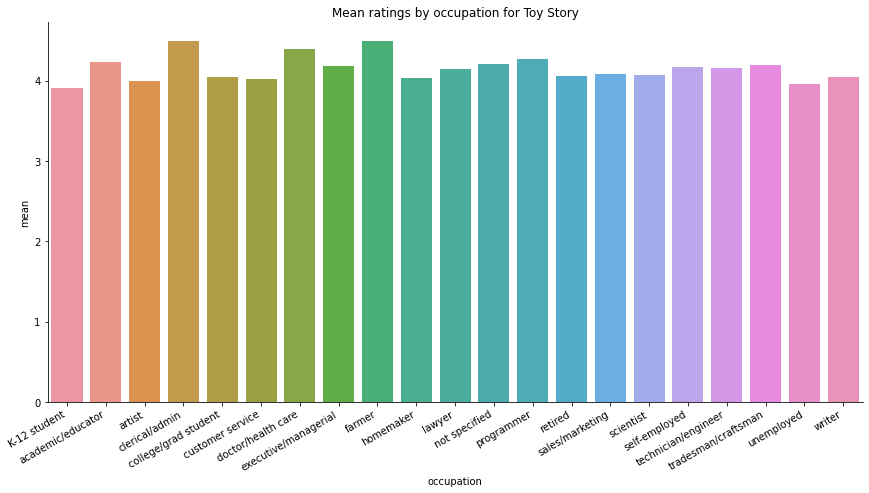

In [15]:
ax = sns.catplot(x = 'occupation', y = 'mean', data = my_movie_agg, kind = 'bar', height=6, aspect=2)
plt.title('Mean ratings by occupation for Toy Story')
ax.set_xticklabels(rotation = 30, horizontalalignment='right');


### 3) Number of ratings per occupation

Let us plot the number of ratings received for Toy Story by occupation. 
- Maximum of the movie's ratings are from Executive/managerial and self-employed category

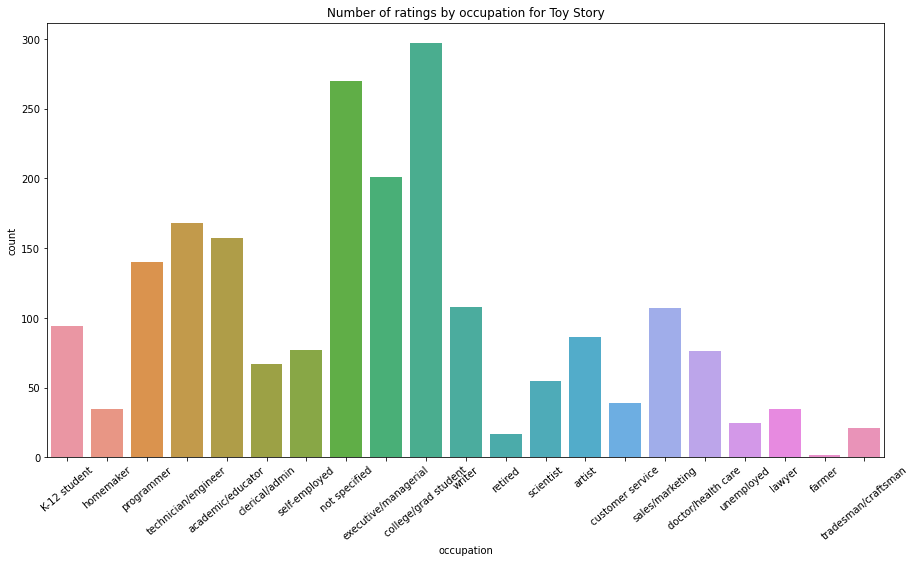

In [16]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'occupation', data = my_movie)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.title('Number of ratings by occupation for Toy Story')
plt.show()

### 4) Box plot of ratings across occupation

Box plot shows the distribution of ratings across categories. 
- From the plot we can see, for almost all categories the median in on the higher side >= 4. We can see the movie mostly receives good ratings from people of all occupations

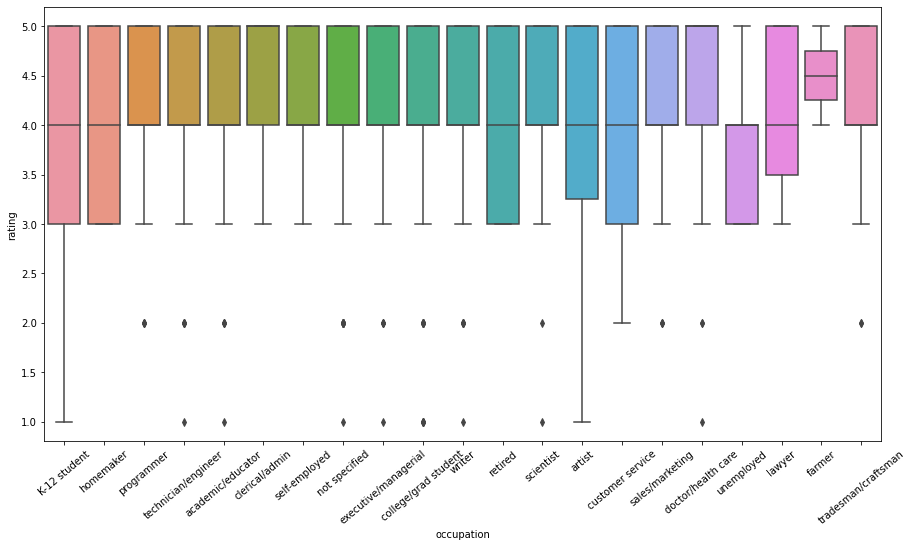

In [17]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='occupation', y='rating', data=my_movie)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

### 5) Gender and occupation based number of ratings

Let us look at comparison of Gender and Occupation on ratings for Toy Story. 
- In each occupation category, the number of ratings (count) is more by males than females, except in the homemaker category

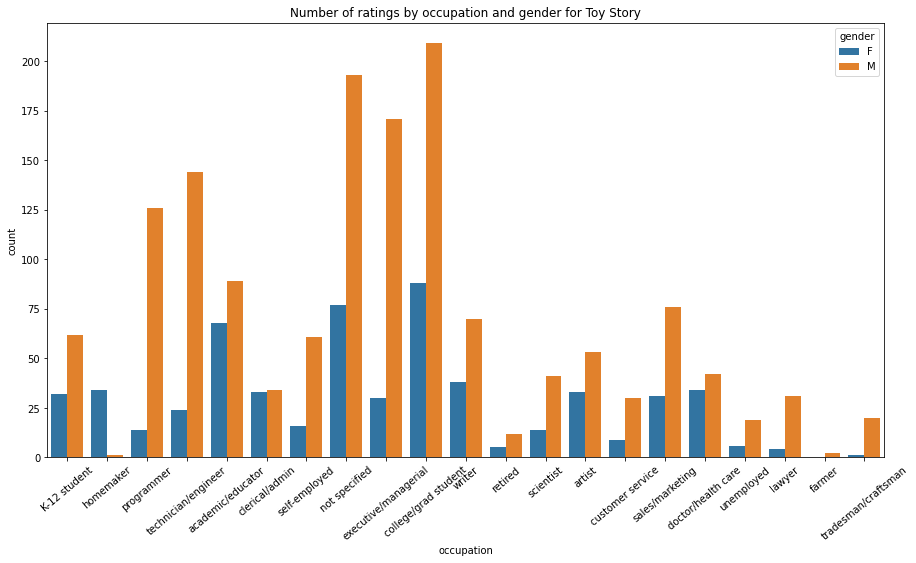

In [18]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'occupation', data = my_movie, hue='gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.title('Number of ratings by occupation and gender for Toy Story')
plt.show()

## 5. User details function

Write a function that given a user id, returns: 
1. this user’s age and occupation
2. the average rating given by this user
3. his highest and lowest rated movie(s)

In [19]:
def user_stats(uid):
    #We use original dataset to avoid duplication and incorrect aggregate calculation
    df = total_df
    ret_dict = {}
    user_df = df[df['user_id'] == uid]
    min_rating = user_df['rating'].min()
    max_rating = user_df['rating'].max()
    
    ret_dict['age'],  ret_dict['occupation'] = user_df.iloc[0][['age','occupation']]
    ret_dict['avg_rating'] = user_df['rating'].mean()
    ret_dict['min_rated_movies'] = list(set(user_df[user_df['rating'] == min_rating]['title']))
    ret_dict['max_rated_movies'] = list(set(user_df[user_df['rating'] == max_rating]['title']))
    
    return(ret_dict)

    

Check user details and stats for user_id 4

In [20]:
user_stats(uid = 4)

{'age': '45-49',
 'occupation': 'executive/managerial',
 'avg_rating': 4.190476190476191,
 'min_rated_movies': ['Predator (1987)'],
 'max_rated_movies': ['Saving Private Ryan (1998)',
  'Good, The Bad and The Ugly, The (1966)',
  'Goldfinger (1964)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Rocky (1976)',
  'Jaws (1975)',
  'Terminator, The (1984)',
  'Hustler, The (1961)',
  'Run Lola Run (Lola rennt) (1998)',
  'Raiders of the Lost Ark (1981)']}

## 6. Other analysis

### 1) Word cloud of movie titles

Let us generate a word cloud from movie titles. 
- The most frequently rated movies will be highlighted by the word cloud. 
- Movies like Star Trek, Lethal Weapon, Toy Story, Jurassic Park, Star Wars etc can be seen clearly in the word cloud.

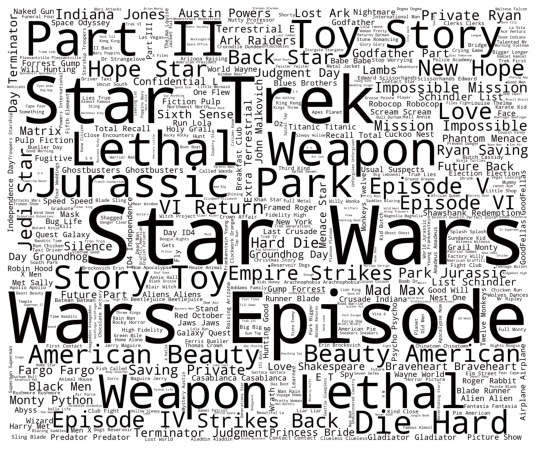

In [21]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")


wordcloud = WordCloud(width=3000, 
                      height=2500,
                      background_color='white',
                      max_words=500
                        ).generate(' '.join(total_df['title']))
wordcloud.recolor(color_func = grey_color_func)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2) Word cloud of genres

Similarly let us analyse genres using word cloud. 
- Comedy, Action and Drama are most occurring genres.

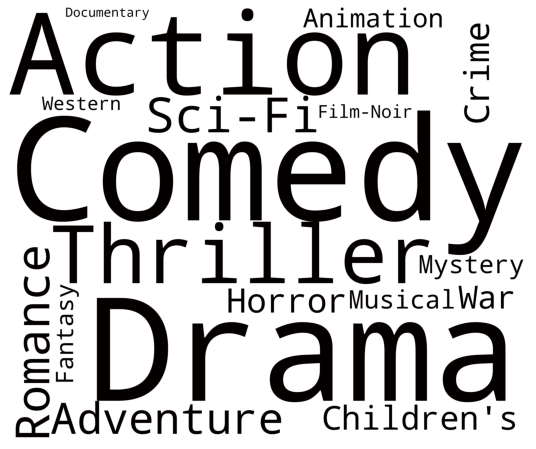

In [22]:
data = df['genres'].value_counts().to_dict()
#wc = WordCloud()
wordcloud = WordCloud(width=3000, 
                      height=2500,
                      background_color='white',
                      max_words=500
                        ).generate_from_frequencies(data)
wordcloud.recolor(color_func = grey_color_func)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 3) Facet Grid of ratings based on genre and age

Let us see the distribution of ratings according to genres, age and genders. The plot below shows a line plot for each genre category and genders. We can see female viewers prefer Animation, Children's, Fantasy categories more than male viewers.

<Figure size 1080x1080 with 0 Axes>

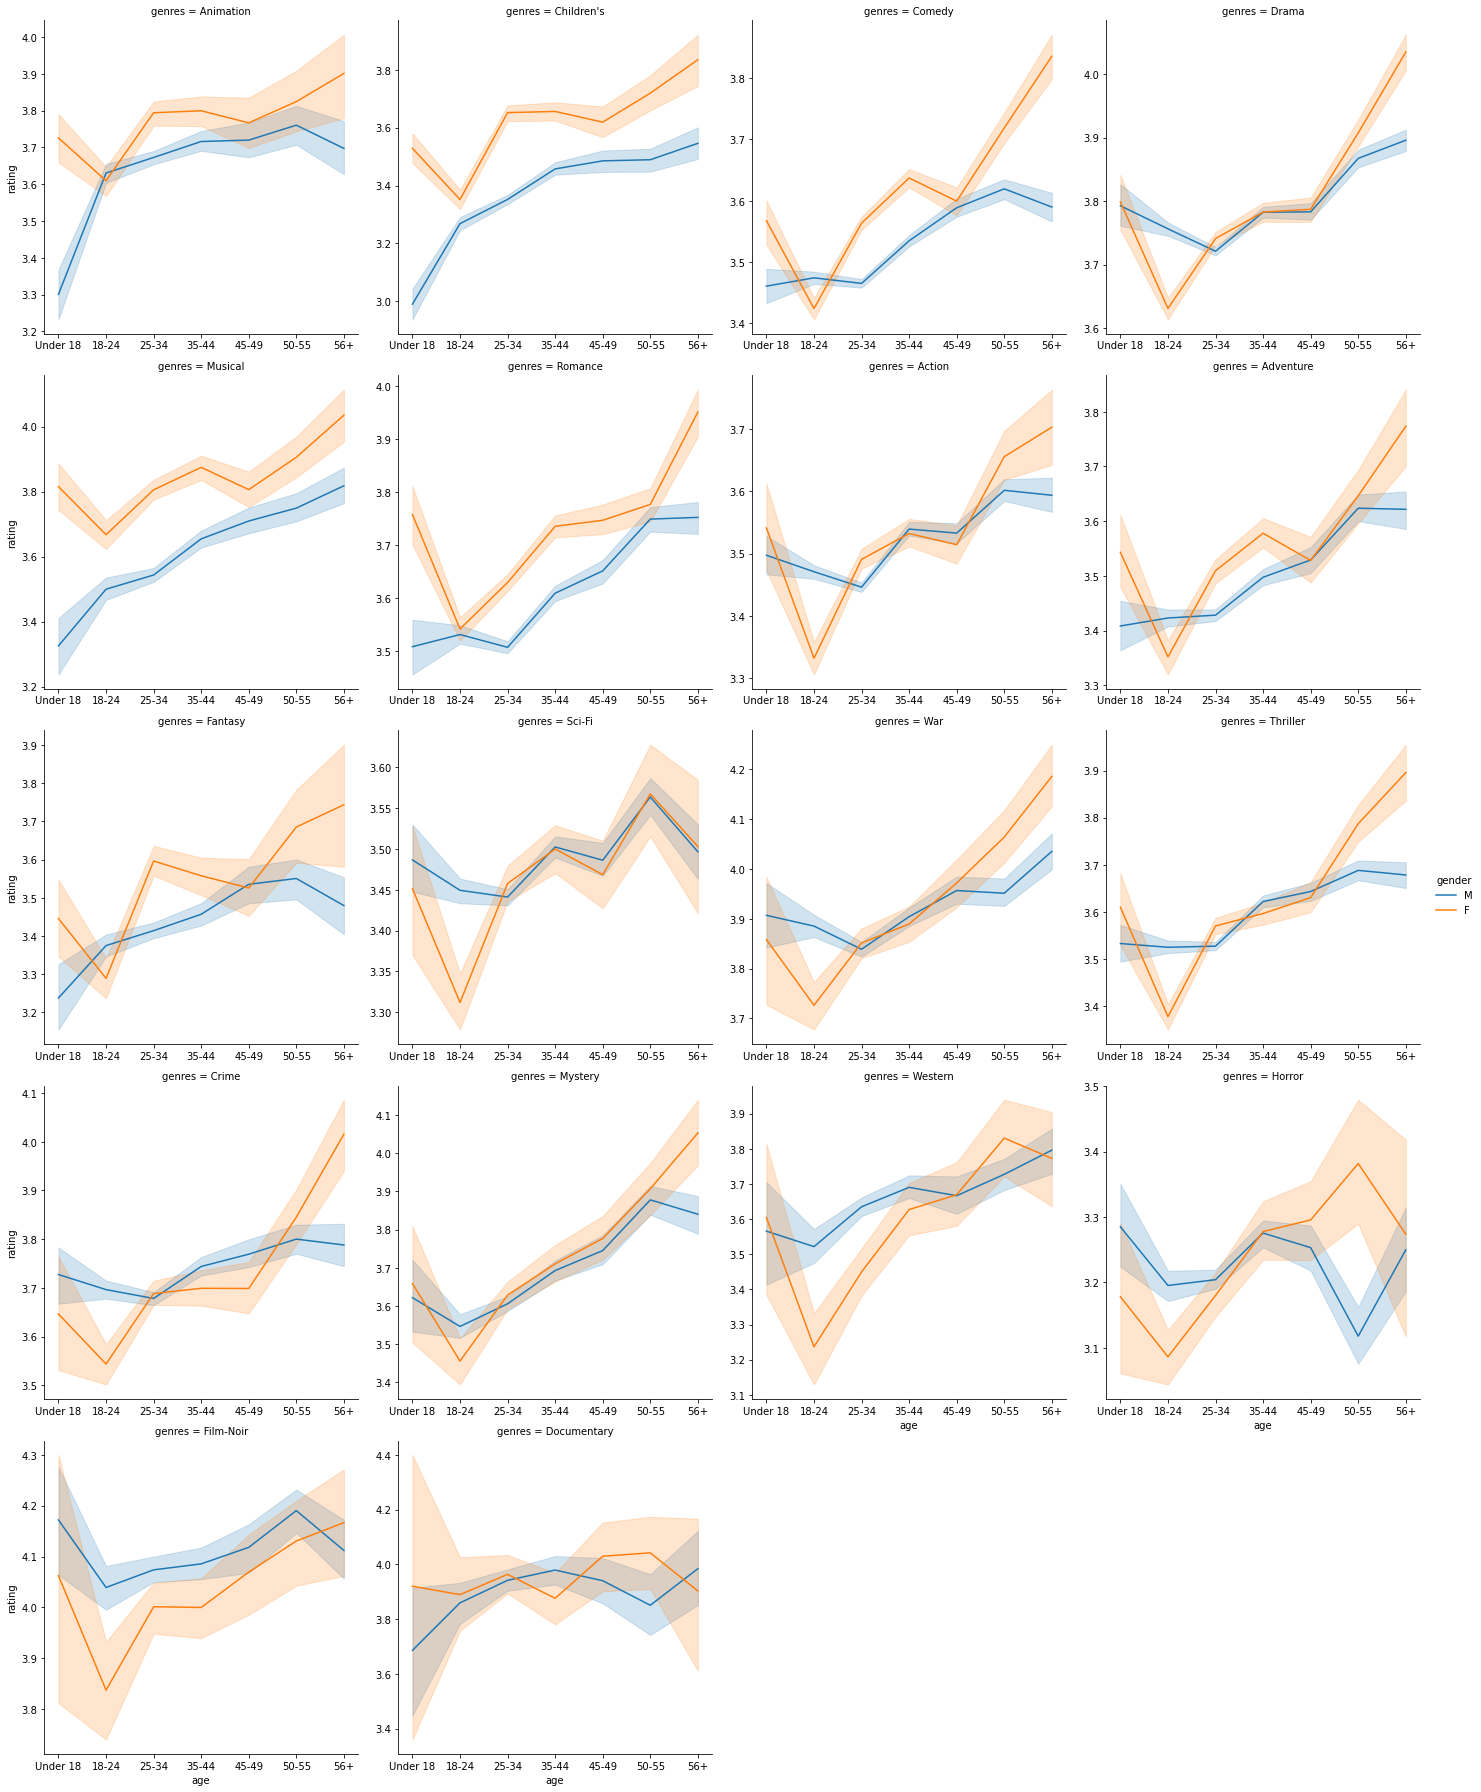

In [36]:
plt.figure(figsize = (15,15));
sns.relplot(data=df, x='age', y='rating', col='genres', hue='gender', kind='line', col_wrap=4,
            facet_kws={'sharey': False, 'sharex': False}
           );


### 4) Time based movie analysis

Assuming the dataset consists of all movies, we can analyse the number of movies made/rated as years progress. 
- Using this analysis, we can see there is an increase in the number of movies made as years pass.
- The number of movies peak around 1996 and is high in 1994 - 1998 period

In [24]:
# Extracting year from movie titles
time_df = pd.DataFrame()
time_df['title'] = movies.title
time_df['year'] = time_df.title.str.extract('.*\((.*)\).*', expand = False)

In [25]:
year_df = time_df.groupby('year').size().reset_index()
year_df.columns.values[1] = 'count'
year_df = year_df.sort_values(by = 'year')
year_df

year  count
0   1919      3
1   1920      2
2   1921      1
3   1922      2
4   1923      3
5   1925      6
6   1926      8
7   1927      6
8   1928      3
9   1929      3
10  1930      7
11  1931      7
12  1932      7
13  1933      7
14  1934      7
15  1935      6
16  1936      8
17  1937     11
18  1938      6
19  1939     11
20  1940     19
21  1941     11
22  1942     13
23  1943     10
24  1944     13
25  1945     11
26  1946     13
27  1947     14
28  1948     12
29  1949     10
30  1950     14
31  1951     12
32  1952     11
33  1953     14
34  1954     15
35  1955     19
36  1956     19
37  1957     20
38  1958     22
39  1959     22
40  1960     15
41  1961     19
42  1962     20
43  1963     25
44  1964     16
45  1965     20
46  1966     12
47  1967     24
48  1968     22
49  1969     18
50  1970     16
51  1971     26
52  1972     22
53  1973     29
54  1974     28
55  1975     21
56  1976     21
57  1977     22
58  1978     30
59  1979     32
60  1980     41
61  1981     43
62  1982     50
63  1983     35
64  1984     60
65  1985     65
66  1986    104
67  1987     71
68  1988     69
69  1989     60
70  1990     77
71  1991     60
72  1992    102
73  1993    165
74  1994    257
75  1995    342
76  1996    345
77  1997    315
78  1998    337
79  1999    283
80  2000    156

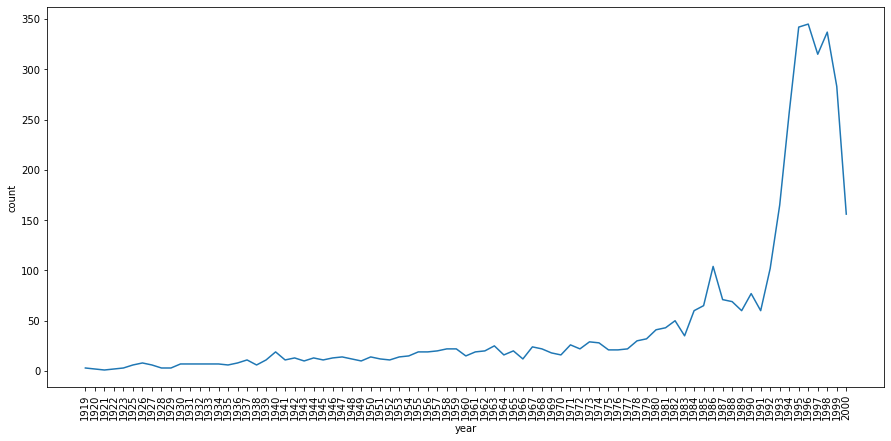

In [26]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(data = year_df, x = 'year', y='count')
plt.xticks(rotation=90)
plt.show()

### 5) Occupation wise age distribution

Let's look at the age distribution of each occupation.

In [27]:
age_occ_df = total_df.groupby(['occupation','age']).size().reset_index()
age_occ_df.columns.values[2] = 'count'
age_occ_df

occupation       age  count
0            K-12 student  Under 18  19666
1            K-12 student     18-24   3068
2            K-12 student     25-34     50
3            K-12 student     35-44    302
4            K-12 student     45-49      0
5            K-12 student     50-55      0
6            K-12 student       56+    204
7       academic/educator  Under 18    686
8       academic/educator     18-24   6970
9       academic/educator     25-34  33862
10      academic/educator     35-44  17515
11      academic/educator     45-49  12562
12      academic/educator     50-55   8182
13      academic/educator       56+   5574
14                 artist  Under 18    268
15                 artist     18-24   8076
16                 artist     25-34  23419
17                 artist     35-44   9953
18                 artist     45-49   4297
19                 artist     50-55   2634
20                 artist       56+   1421
21         clerical/admin  Under 18      0
22         clerical/admin     18-24   3270
23         clerical/admin     25-34  14694
24         clerical/admin     35-44   7354
25         clerical/admin     45-49   2933
26         clerical/admin     50-55   1928
27         clerical/admin       56+   1444
28   college/grad student  Under 18    221
29   college/grad student     18-24  88024
30   college/grad student     25-34  38971
31   college/grad student     35-44   3124
32   college/grad student     45-49    250
33   college/grad student     50-55    442
34   college/grad student       56+      0
35       customer service  Under 18      0
36       customer service     18-24   2560
37       customer service     25-34  10960
38       customer service     35-44   5549
39       customer service     45-49   2082
40       customer service     50-55    677
41       customer service       56+     22
42     doctor/health care  Under 18      0
43     doctor/health care     18-24   2038
44     doctor/health care     25-34  12916
45     doctor/health care     35-44   8742
46     doctor/health care     45-49   4920
47     doctor/health care     50-55   7302
48     doctor/health care       56+   1287
49   executive/managerial  Under 18    284
50   executive/managerial     18-24   3739
51   executive/managerial     25-34  43082
52   executive/managerial     35-44  32866
53   executive/managerial     45-49  11928
54   executive/managerial     50-55   9856
55   executive/managerial       56+   3670
56                 farmer  Under 18     43
57                 farmer     18-24     28
58                 farmer     25-34    647
59                 farmer     35-44    176
60                 farmer     45-49    967
61                 farmer     50-55    569
62                 farmer       56+    276
63              homemaker  Under 18      0
64              homemaker     18-24    975
65              homemaker     25-34   2720
66              homemaker     35-44   5564
67              homemaker     45-49   1034
68              homemaker     50-55    683
69              homemaker       56+    369
70                 lawyer  Under 18     30
71                 lawyer     18-24   1278
72                 lawyer     25-34   8868
73                 lawyer     35-44   4757
74                 lawyer     45-49   2869
75                 lawyer     50-55   2482
76                 lawyer       56+    279
77          not specified  Under 18   3844
78          not specified     18-24  17823
79          not specified     25-34  62185
80          not specified     35-44  24334
81          not specified     45-49   8254
82          not specified     50-55  11081
83          not specified       56+   2978
84             programmer  Under 18    446
85             programmer     18-24   8312
86             programmer     25-34  27527
87             programmer     35-44  12669
88             programmer     45-49   4380
89             programmer     50-55   2776
90             programmer       56+   1104
91                retired  Under 18     23
92              

<b>Some observations</b>
- As expected, K-12 students are mostly in 'Under 18' category
- Scientists are mostly in 25-34 category
- College/grad students are spread accross 18 - 34 ages
- Retired viewers are mostly 56+, with few in 50-55 group
- Farmers are highly in 45 - 49 group

<Figure size 1080x720 with 0 Axes>

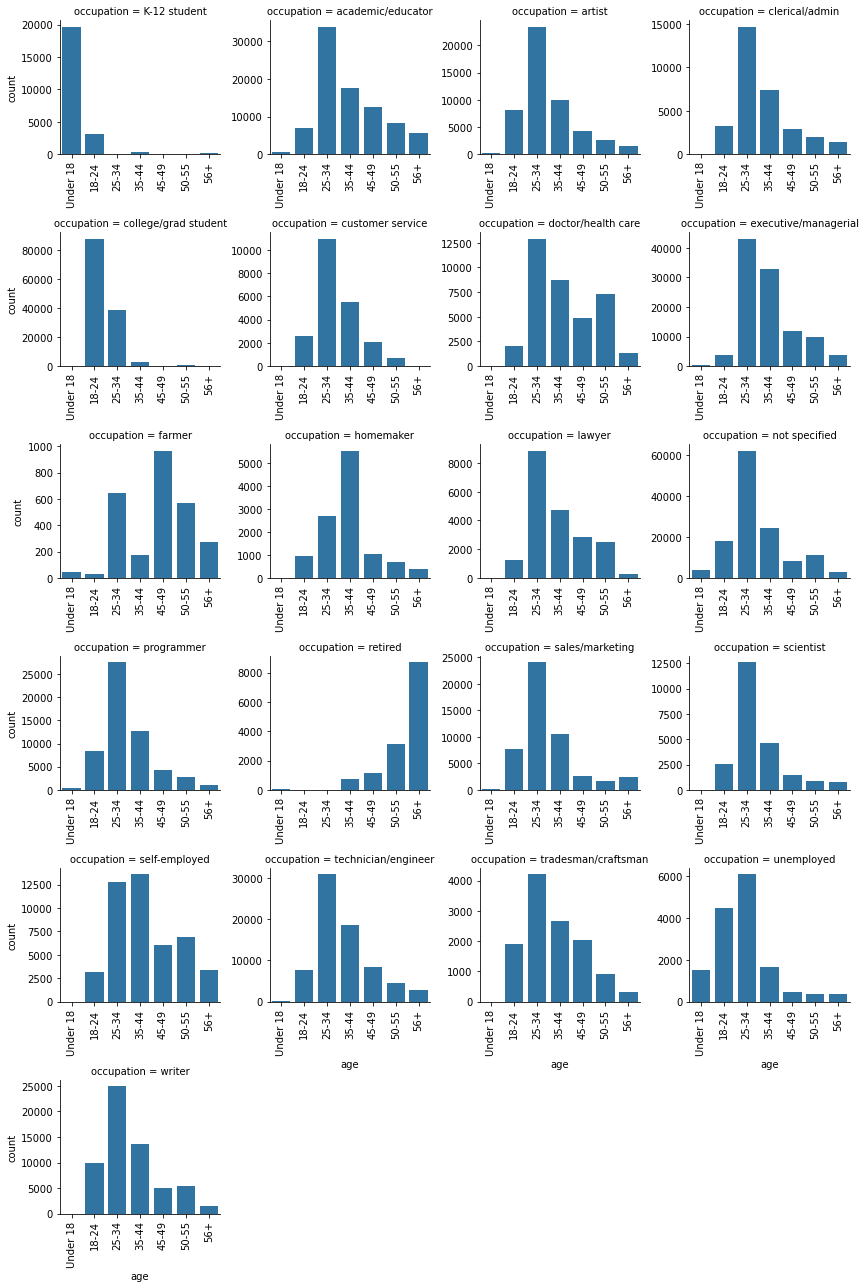

In [28]:
plt.figure(figsize=(15,10));
g = sns.FacetGrid(data = age_occ_df, col = 'occupation', col_wrap=4, sharex=False, sharey=False);
g.map_dataframe(sns.barplot, x = 'age', y = 'count',);
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
g.fig.tight_layout();


### 6) Age wise ratings distribution for genders

The plot clearly displays the distribution of ratings of male and female viewers based on age. Some observations:
- Women have given higher ratings in all categories except in age 18-24
- There is an increasing rating trend with respect to age of viewers

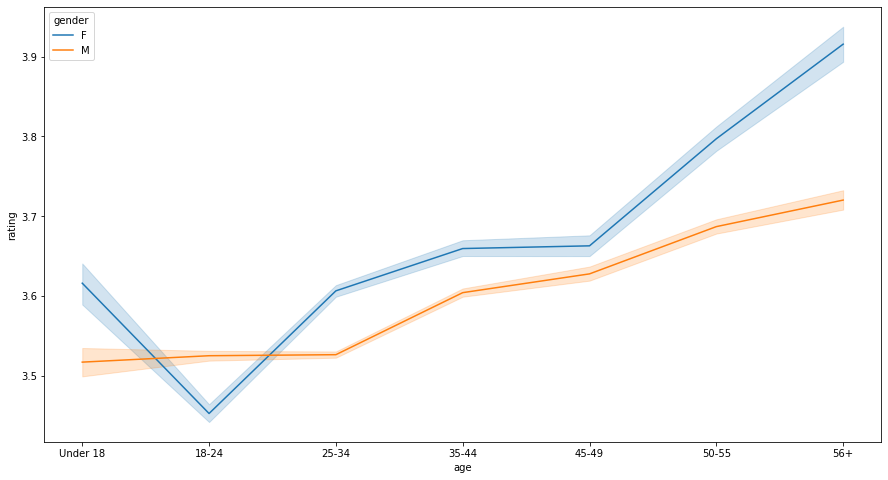

In [29]:
plt.figure(figsize = (15,8))
sns.lineplot(data=total_df, x='age', y='rating', hue='gender' );

### 7) Top 5 users with most ratings 

In [30]:
top_users = total_df.groupby('user_id').size().sort_values(ascending=False).head(5).reset_index()
top_users.columns.values[1] = 'count'
top_users

user_id  count
0     4169   2314
1     1680   1850
2     4277   1743
3     1941   1595
4     1181   1521

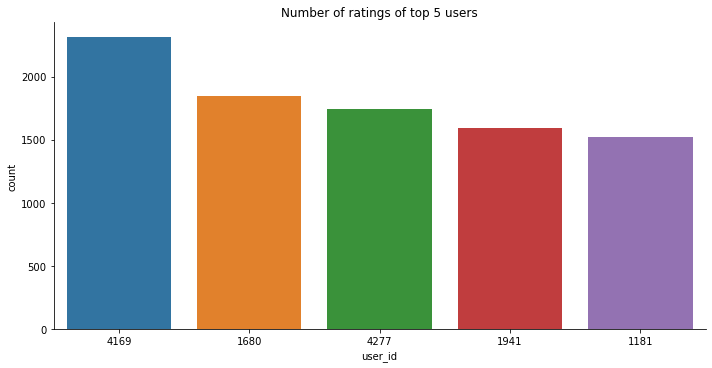

In [31]:
sns.catplot(x = 'user_id', y = 'count', data=top_users, kind = 'bar', 
            order= top_users.sort_values('count', ascending=False).user_id,
           height=5, aspect = 2)
plt.title("Number of ratings of top 5 users")
plt.show()

In [32]:
age_agg = total_df.groupby(['age']).agg({'rating':['mean','count']})
age_agg.columns = age_agg.columns.droplevel()
age_agg

mean   count
age                       
Under 18  3.549520   27211
18-24     3.507573  183536
25-34     3.545235  395556
35-44     3.618162  199003
45-49     3.638062   83633
50-55     3.714512   72490
56+       3.766632   38780

In [33]:
type(age_agg['count'])


pandas.core.series.Series

In [34]:
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
    r = age_agg['mean'],
    theta = age_agg.index,
    fill = 'toself',
    name = 'Count of Ratings'
        
    )
)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()